In [190]:
import email
import glob
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, 
                              GradientBoostingClassifier, VotingClassifier, 
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bs4 import BeautifulSoup as bs
import re

In [3]:
phish = "C:/Users/dhruv/Jupyter Notebooks/projects/Canary/Phishing Dataset/phishing/"
normal = "C:/Users/dhruv/Jupyter Notebooks/projects/Canary/Phishing Dataset/normal/"

In [4]:
phish =glob.glob(phish + "*.*")
normal = glob.glob(normal + '*.*')

In [5]:
# mm = os.path.join(phish, '34.eml')
# with open(mm, 'r') as f:
#     cont = f.read()
#     b = email.message_from_string(cont)
# x = b.get_payload()
# soup = bs(x, 'html.parser')
# # body = re.sub('\s+', ' ', bs(x, 'html.parser').get_text()).strip()

In [6]:
# Initialiasing the lists to store the attributes
lnks = []; dear = []; account = []; secure = []; bank = []; html = []; protect = []; click = [];
verify = []; sus = []; eb_pay = []; clss = []; log = []; img = []; please = []; thank = []


# Calculating and storing all the attributes in the loop below
for fl in phish:
    # Calculating all the attribues for the phishing mails
    with open(fl, 'r', errors = 'ignore') as f:
        content = f.read()
        # Extracting the mail and its metadata from the file
        b = email.message_from_string(content)

        # Extracting the meaningful information from the message extracted
        if b.is_multipart():
            for part in b.get_payload():
                mail = part.get_payload()
        else:
            mail = b.get_payload()

        # If I can directly access the mail then get the body else just skip the given mail
        try:
            soup = bs(mail, 'html.parser')
            body = re.sub('\s+', ' ', soup.get_text()).strip()
        except:
            continue

        # Extract all the links from the body of the mail
        imgs = soup.find_all('img')
        # links = re.findall('htt?p?s?://\S+', body)
        links = soup.find_all('a')
        htmls = soup.find_all()

        # Convert all the strings in the body to lower case
        body = body.lower()
        
        # Store the number of links in the lnks variable
        html.append(len(htmls))
        lnks.append(len(links))
        img.append(len(imgs))
        
        # Check if the mail contains the word dear in it
        if 'dear' in body:
            dear.append(1)
        else:
            dear.append(0)
        
        # Check if the word login is in the body
        if 'login' in body or 'log in' in body or 'log-in' in body:
            log.append(1)
        else:
            log.append(0)  

        # Check if the mail contains the word account in it
        if 'account' in body:
            account.append(1)
        else:
            account.append(0)


        # Check if the mail contains the word bank in it
        if 'bank' in body:
            bank.append(1)
        else:
            bank.append(0)  
            
        # Check if the mail contains the word please in it
        if 'please' in body:
            please.append(1)
        else:
            please.append(0) 
        
        # Check if the mail contains the word protect in it
        if 'protect' in body:
            protect.append(1)
        else:
            protect.append(0) 
        
        # Check if the mail contains the word click in it
        if 'click' in body or 'select' in body or 'visit' in body:
            click.append(1)
        else:
            click.append(0)

        # Check if the mail contains the word thank you in it
        if 'thank you' in body:
            thank.append(1)
        else:
            thank.append(0)    
        
        # Check if the mail contains the word secure or security in it        
        if 'secure' in body or 'security' in body:
            secure.append(1)
        else:
            secure.append(0)
            
        # Check if the mail contains the word suspend or suspended in it
        if 'suspend' in body or 'suspended' in body:
            sus.append(1)
        else:
            sus.append(0)
            
        # Check if the mail contains the word verify in it
        if 'verify' in body:
            verify.append(1)
        else:
            verify.append(0)
        
        # Check if the mail contains the word ebay or paypal in it
        if 'ebay' in body or 'paypal' in body:
            eb_pay.append(1)
        else:
            eb_pay.append(0)
            

        # Class for the phishing mails is 1
        clss.append(1)
        
for fl in normal:
    # Calculating all the attribues for the normal mails
    with open(fl, 'r', errors = 'ignore') as f:
        content = f.read()
        # Extracting the mail and its metadata from the file
        b = email.message_from_string(content)

        # Extracting the meaningful information from the message extracted
        if b.is_multipart():
            for part in b.get_payload():
                mail = part.get_payload()
        else:
            mail = b.get_payload()

        # If I can directly access the mail then get the body else just skip the given mail
        try:
            soup = bs(mail, 'html.parser')
            body = re.sub('\s+', ' ', soup.get_text()).strip()
        except:
            continue

        # Extract all the links from the body of the mail
        imgs = soup.find_all('img')
        # links = re.findall('htt?p?s?://\S+', body)
        links = soup.find_all('a')
        htmls = soup.findAll()


        # Convert all the strings in the body to lower case
        body = body.lower()
        
        # Store the number of links in the lnks variable
        img.append(len(imgs))
        lnks.append(len(links))
        html.append(len(htmls))
        
        # Check if the mail contains the word dear in it
        if 'dear' in body:
            dear.append(1)
        else:
            dear.append(0)
            
        # Check if the mail contains the word account in it
        if 'account' in body:
            account.append(1)
        else:
            account.append(0)
        
        # Check if the mail contains the word bank in it
        if 'please' in body:
            bank.append(1)
        else:
            bank.append(0)
        
        # Check if the mail contains the word protect in it
        if 'protect' in body:
            protect.append(1)
        else:
            protect.append(0) 
        
        # Check if the mail contains the word click in it
        if 'click' in body or 'select' in body or 'visit' in body:
            click.append(1)
        else:
            click.append(0)
            
        # Check if the mail contains the word thank you in it
        if 'thank you' in body:
            thank.append(1)
        else:
            thank.append(0)  

        # Check if the word login is in the body
        if 'login' in body or 'log in' in body or 'log-in' in body:
            log.append(1)
        else:
            log.append(0)  
            
        # Check if the mail contains the word please in it
        if 'please' in body:
            please.append(1)
        else:
            please.append(0)  

        # Check if the mail contains the word secure or security in it        
        if 'secure' in body or 'security' in body:
            secure.append(1)
        else:
            secure.append(0)
            
        # Check if the mail contains the word suspend or suspended in it
        if 'suspend' in body or 'suspended' in body:
            sus.append(1)
        else:
            sus.append(0)
            
        # Check if the mail contains the word verify in it
        if 'verify' in body:
            verify.append(1)
        else:
            verify.append(0)
        
        # Check if the mail contains the word ebay or paypal in it
        if 'ebay' in body or 'paypal' in body:
            eb_pay.append(1)
        else:
            eb_pay.append(0)

        # Class for normal mails is 0  
        clss.append(0)


In [7]:
[len(lnks), len(dear), len(account), len(secure), len(verify), len(protect), len(sus), len(click),  
len(eb_pay), len(clss), len(log), len(img), len(bank), len(html), len(thank)]

[4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774,
 4774]

In [184]:
# Convert all the data calculated and extracted above in a dictionary
data = {'Links':lnks, 
        'Dears': dear, 
        'Account': account, 
        'HTML': html, 
        # 'Secure': secure, 
        # 'Login': log, 
        'Protect': protect, 
        # 'Verify': verify, 
        'Click': click,
        # 'Suspend': sus, 
        'Images': img, 
        'Bank': bank, 
        'Please': please, 
        'Thank You': thank, 
        'Ebay and Paypal': eb_pay, 
        'Target': clss}
df = pd.DataFrame(data)

X = df.drop(['Target'], axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42, stratify = y)

ss = StandardScaler()
columns = ['Links', 'HTML', 'Images']
X_train.loc[:, columns] = ss.fit_transform(X_train[columns])
X_test.loc[:, columns] = ss.transform(X_test[columns])

param = [
    {'n_estimators': range(20, 160, 20), 
     'max_depth': range(8, 20, 4),
     'max_leaf_nodes': range(32, 56, 4),
    }
]

et = ExtraTreesClassifier()
gs_et = GridSearchCV(et, param, cv = 5, n_jobs = -1, verbose = 1)
gs_et.fit(X_train, y_train)

et_best = gs_et.best_estimator_
gs_et.best_estimator_, gs_et.score(X_test, y_test)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


(ExtraTreesClassifier(max_depth=16, max_leaf_nodes=44, n_estimators=40),
 0.9298429319371728)

In [210]:
print('Feature Importances:')
pd.Series(et_best.feature_importances_, index = X_train.columns)

Feature Importances:


Links              0.037604
Dears              0.166028
Account            0.085075
HTML               0.060647
Protect            0.028697
Click              0.033478
Images             0.030596
Bank               0.038882
Please             0.262537
Thank You          0.140416
Ebay and Paypal    0.116040
dtype: float64

In [61]:
X = df.drop(['Target'], axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42, stratify = y)

In [62]:
ss = StandardScaler()
columns = ['Links', 'HTML', 'Images']
X_train.loc[:, columns] = ss.fit_transform(X_train[columns])
X_test.loc[:, columns] = ss.transform(X_test[columns])

In [63]:
param = [
    {'n_estimators': range(8, 28, 4), 
     'max_depth': range(24, 48, 4),
     'max_leaf_nodes': range(20, 48, 4),
    }
]

et = ExtraTreesClassifier()
gs_et = GridSearchCV(et, param, cv = 5, n_jobs = -1, verbose = 1)
gs_et.fit(X_train, y_train)

et_best = gs_et.best_estimator_
gs_et.best_estimator_, gs_et.score(X_test, y_test)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


(ExtraTreesClassifier(max_depth=44, max_leaf_nodes=44, n_estimators=20),
 0.9287958115183246)

In [9]:
pd.value_counts(df[(df['Click'] == 1)]['Target'])

1    1301
0     533
Name: Target, dtype: int64

In [10]:
df[(df['Protect'] == 1) ]

,Links,Dears,Account,HTML,Secure,Login,Protect,Verify,Click,Suspend,Images,Bank,Please,Thank You,Ebay and Paypal,Target
2,3,1,1,101,1,1,1,0,1,0,1,0,1,1,1,1
3,5,1,1,110,1,1,1,0,1,0,7,0,1,1,1,1
4,1,0,1,27,0,1,1,1,1,1,0,0,1,1,1,1
6,1,0,1,55,0,1,1,0,0,0,4,0,1,1,1,1
7,1,0,1,57,1,0,1,0,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4417,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4518,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4548,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [12]:
X_train.head()

,Links,Dears,Account,HTML,Secure,Login,Protect,Verify,Click,Suspend,Images,Bank,Please,Thank You,Ebay and Paypal
3563,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2747,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2224,6,1,1,235,1,1,1,0,1,0,54,1,0,1,1
71,1,1,1,28,1,0,0,0,1,0,1,1,1,1,0
3476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test.head()

,Links,Dears,Account,HTML,Secure,Login,Protect,Verify,Click,Suspend,Images,Bank,Please,Thank You,Ebay and Paypal
839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
902,1,1,1,18,1,1,0,0,1,0,1,1,1,1,0
4439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
627,1,0,1,46,1,1,0,0,0,1,0,1,1,1,1
1821,1,1,0,36,0,0,0,0,1,0,0,1,1,1,0


In [15]:
X_train.head()

,Links,Dears,Account,HTML,Secure,Login,Protect,Verify,Click,Suspend,Images,Bank,Please,Thank You,Ebay and Paypal
3563,-0.440672,0,0,-0.497285,0,0,0,0,0,0,-0.349512,0,0,0,0
2747,-0.440672,1,0,-0.511452,0,0,0,0,0,0,-0.349512,1,1,0,0
2224,1.182209,1,1,2.817871,1,1,1,0,1,0,6.424146,1,0,1,1
71,-0.170192,1,1,-0.114767,1,0,0,0,1,0,-0.224074,1,1,1,0
3476,-0.440672,0,0,-0.511452,0,0,0,0,0,0,-0.349512,0,0,0,0


In [16]:
X_test.head()

,Links,Dears,Account,HTML,Secure,Login,Protect,Verify,Click,Suspend,Images,Bank,Please,Thank You,Ebay and Paypal
839,-0.440672,0,0,-0.511452,0,0,0,0,0,0,-0.349512,0,0,0,0
902,-0.170192,1,1,-0.256440,1,1,0,0,1,0,-0.224074,1,1,1,0
4439,-0.440672,0,0,-0.511452,0,0,0,0,0,0,-0.349512,0,0,0,0
627,-0.170192,0,1,0.140245,1,1,0,0,0,1,-0.349512,1,1,1,1
1821,-0.170192,1,0,-0.001428,0,0,0,0,1,0,-0.349512,1,1,1,0


In [17]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [18]:
svc.score(X_test, y_test)

0.9225130890052357

In [194]:
param = [
    {
        'kernel': ['rbf'], 
        'C': [0.1, 0.3, 1, 2, 3, 4], 
        'gamma': [0.3, 1, 3, 10, 12, 15, 25, 28]
    }, 
]

svc = SVC(probability = True)
gs_svc = GridSearchCV(svc, param, cv = 5, n_jobs = -1, verbose = 1)
gs_svc.fit(X_train, y_train)
svc_best = gs_svc.best_estimator_
gs_svc.best_estimator_, gs_svc.score(X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(SVC(C=3, gamma=3, probability=True), 0.9277486910994764)

In [195]:
param_grid={
    'max_depth': range(2, 10, 2),
    'n_estimators': range(26, 46, 2),
    'learning_rate': [0.2, 0.1, 0.03, 0.01]
}

xg = XGBClassifier(eval_metric='logloss', n_jobs = -1, tree_method = 'gpu_hist', use_label_encoder = False)
gs_xg = GridSearchCV(xg, param_grid, cv = 5, n_jobs = -1, verbose = 1)
gs_xg.fit(X_train, y_train)

xg_best = gs_xg.best_estimator_
gs_xg.best_params_, gs_xg.score(X_test, y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


({'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 36},
 0.9235602094240838)

In [196]:
param = [
    {'n_estimators': range(12, 36, 4), 
     'max_depth': range(8, 24, 4),
     'max_leaf_nodes': range(8, 28, 4),
    }
]

gb = GradientBoostingClassifier()
gs_gb = GridSearchCV(gb, param, cv = 5, n_jobs = -1, verbose = 1)
gs_gb.fit(X_train, y_train)


gb_best = gs_gb.best_estimator_
gs_gb.best_estimator_, gs_gb.score(X_test, y_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


(GradientBoostingClassifier(max_depth=8, max_leaf_nodes=16, n_estimators=28),
 0.9246073298429319)

In [197]:
param = [
    {'n_estimators': [100, 200, 300, 400, 450, 500], 
     'max_depth': [3, 4, 6, 8, 10, 12], 
     'max_leaf_nodes': [15, 20, 25]}, 
]

rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rf.fit(X_train, y_train)

rf_best = gs_rf.best_estimator_
gs_rf.best_estimator_, gs_rf.score(X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


(RandomForestClassifier(max_depth=8, max_leaf_nodes=25), 0.9246073298429319)

In [198]:
param = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(4, 20, 2),
        'max_leaf_nodes': range(20, 44, 2),
    }
]

dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(dt, param, cv = 5, n_jobs = -1, verbose = 1)
gs_dt.fit(X_train, y_train)

dt_best = gs_dt.best_estimator_
gs_dt.best_estimator_,  gs_dt.score(X_test, y_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


(DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=28),
 0.9256544502617801)

In [199]:
param = [
    {'n_estimators': [50, 100, 150, 200, 300, 400]}
]
ada = AdaBoostClassifier()
gs_ada = GridSearchCV(ada, param, cv = 5, n_jobs = -1, verbose = 1)
gs_ada.fit(X_train, y_train)

ada_best = gs_ada.best_estimator_
gs_ada.best_estimator_, gs_ada.score(X_test, y_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


(AdaBoostClassifier(n_estimators=200), 0.9193717277486911)

In [49]:
fi = pd.Series(et_best.feature_importances_, index = X_train.columns)
fi

Links              0.051180
Dears              0.166835
Account            0.150790
HTML               0.039054
Secure             0.020681
Login              0.012907
Verify             0.002116
Click              0.025239
Suspend            0.001902
Images             0.021124
Bank               0.023387
Please             0.245094
Thank You          0.151359
Ebay and Paypal    0.088333
dtype: float64

In [200]:
param = [
    {'n_neighbors': range(2, 14, 1)}
]

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, param, cv = 5, n_jobs = -1)
gs_knn.fit(X_train, y_train)

knn_best = gs_knn.best_estimator_
gs_knn.best_estimator_, gs_knn.score(X_test, y_test)

(KNeighborsClassifier(), 0.7476439790575916)

In [28]:
gs_knn.score(X_test, y_test)

0.9225130890052357

In [201]:
vc_lr = LogisticRegression(solver = 'sag')
vc_mlp = MLPClassifier()

vc = VotingClassifier(estimators = [('rf', rf_best), ('svc', svc_best), ('lr', vc_lr), 
                                    ('mlp', vc_mlp), ('xgc', xg_best), ('knn', knn_best), 
                                    ('ET', et_best), ('dt', dt_best),
                                    ('gb', gb_best)], 
                                    voting = 'soft', n_jobs = -1, verbose = 1)
vc.fit(X_train, y_train), vc.score(X_test, y_test)

(VotingClassifier(estimators=[('rf',
                               RandomForestClassifier(max_depth=8,
                                                      max_leaf_nodes=25)),
                              ('svc', SVC(C=3, gamma=3, probability=True)),
                              ('lr', LogisticRegression(solver='sag')),
                              ('mlp', MLPClassifier()),
                              ('xgc',
                               XGBClassifier(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             enable_categorical=False,
                                             eval_metric='loglo...
                                             use_label_encoder=False,
                                             validate_parameters=1,
                            

In [202]:
vc.score(X_test, y_test)

0.9277486910994764

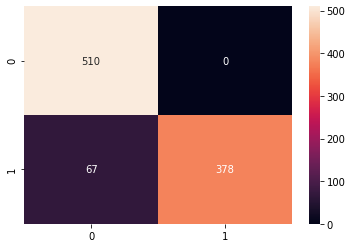

In [191]:
pred = gs_et.predict(X_test)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt = 'g');
plt.savefig('Confusion Matrix')

In [203]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       510
           1       1.00      0.85      0.92       445

    accuracy                           0.93       955
   macro avg       0.94      0.92      0.93       955
weighted avg       0.94      0.93      0.93       955



Accuracies: 
SVC - 0.9277486910994764
RandomForest - 0.9246073298429319
XGBoost - 0.9235602094240838
Gradient Boost - 0.9246073298429319
AdaBoost - 0.9193717277486911
Decision Tree - 0.9256544502617801
Extra Trees - 0.9298429319371728
KNN - 0.7476439790575916
Voting Classifier - 0.9277486910994764


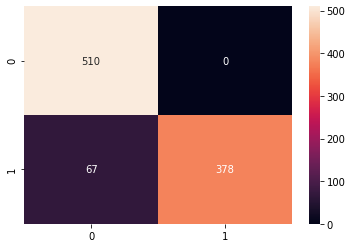

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       510
           1       1.00      0.85      0.92       445

    accuracy                           0.93       955
   macro avg       0.94      0.92      0.93       955
weighted avg       0.94      0.93      0.93       955

Important Features:
Links              0.051180
Dears              0.166835
Account            0.150790
HTML               0.039054
Secure             0.020681
Login              0.012907
Verify             0.002116
Click              0.025239
Suspend            0.001902
Images             0.021124
Bank               0.023387
Please             0.245094
Thank You          0.151359
Ebay and Paypal    0.088333
dtype: float64


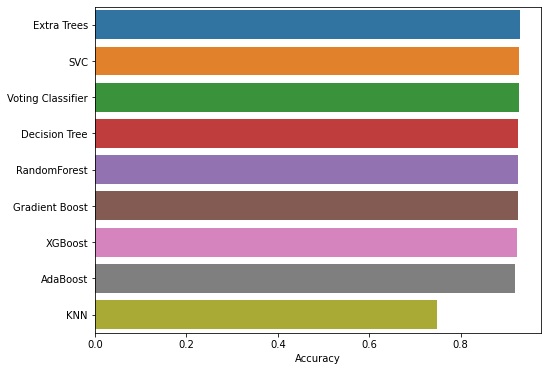

<Figure size 432x288 with 0 Axes>

In [205]:
models = ['SVC', 'RandomForest', 'XGBoost', 'Gradient Boost', 'AdaBoost', 'Decision Tree', 'Extra Trees', 'KNN', 'Voting Classifier']
acc = [svc_best.score(X_test, y_test), 
       rf_best.score(X_test, y_test), 
       xg_best.score(X_test, y_test), 
       gb_best.score(X_test, y_test), 
       ada_best.score(X_test, y_test), 
       dt_best.score(X_test, y_test), 
       et_best.score(X_test, y_test), 
       knn_best.score(X_test, y_test), 
       vc.score(X_test, y_test)]

# Printing the accuracies of all the individual models
print('Accuracies: ')
for i in range(len(models)):
    print(models[i], '-', acc[i])

pred = gs_et.predict(X_test)

# Calculating and plotting the confusion matrix for voting classifier predictions
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt = 'g');
plt.show()

# Printing the classification report
print(classification_report(y_test, pred))


print('Important Features:')
print(fi)

p = {}
for i in range(len(models)):
    p[models[i]] = acc[i]

# Plotting the accuracy comparison chart
p = dict(sorted(p.items(), key = lambda x: x[1], reverse = True))
plt.figure(figsize = (8, 6))
plt.xlabel('Accuracy')
sns.barplot(x = list(p.values()), y = list(p.keys()), orient = 'h');
plt.show()
plt.savefig('Accuracy Comparison')


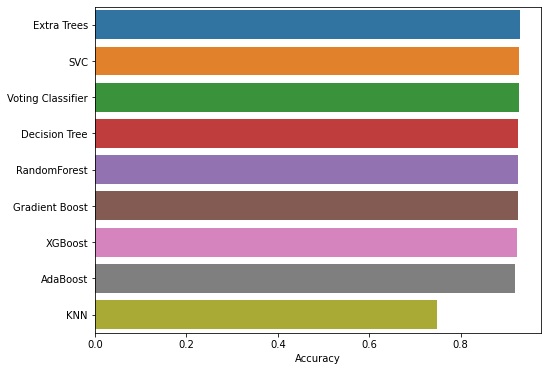

In [208]:
p = dict(sorted(p.items(), key = lambda x: x[1], reverse = True))
plt.figure(figsize = (8, 6))
plt.xlabel('Accuracy')
sns.barplot(x = list(p.values()), y = list(p.keys()), orient = 'h');
plt.savefig('Accuracy Comparison', dpi = 120)
